# Final Project

## Predicting customer churn in Telecommunications Industry using Machine Learning

In [2]:
import pandas as pd  # for data wrangling
import numpy as np  # for array operations
import matplotlib.pyplot as plt # for visualizing data
import seaborn as sns           # for visualizing data

In [3]:
churn_df = pd.read_csv('Telco-Customer-Churn.csv')
churn_df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


## About Telco-Customer-Churn dataset

* It has 7,044 examples and 21 variables:

    * customerID: Customer ID
    * gender: Whether the customer is a male or a female
    * SeniorCitizen: Whether the customer is a senior citizen or not (1, 0)
    * Partner: Whether the customer has a partner or not (Yes, No)
    * Dependents: Whether the customer has dependents or not (Yes, No)
    * tenure: Number of months the customer has stayed with the company
    * PhoneService: Whether the customer has a phone service or not (Yes, No)
    * MultipleLines: Whether the customer has multiple lines or not (Yes, No, No phone service)
    * InternetService: Customer’s internet service provider (DSL, Fiber optic, No)
    * OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)
    * OnlineBackup: Whether the customer has online backup or not (Yes, No, No internet service)
    * DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service)
    * TechSupport: Whether the customer has tech support or not (Yes, No, No internet service)
    * StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service)
    * StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service)
    * Contract: The contract term of the customer (Month-to-month, One year, Two year)
    * PaperlessBilling: Whether the customer has paperless billing or not (Yes, No)
    * PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
    * MonthlyCharges: The amount charged to the customer monthly
    * TotalCharges: The total amount charged to the customer
    * Churn: Whether the customer churned or not (Yes or No)

## Objective of this project

* **My goal is to predict the number of customers leaving phone service**. We need to understand better the situation, which customers are likely to leave and why. Once it is clear what features are impacting customer churn, then we can start creating Machine Learning Models.

* Customer churn is a major problem and one of the most important concerns for large companies. Definitely all industries need to retain their customers. Because getting new customers is much more expensive than retaining existing ones. Due to the direct effect on the revenues of the companies, especially in the telecom field, companies are seeking to develop means to predict potential customer to churn. Therefore, finding factors that increase customer churn is important to take necessary actions to reduce this churn. 

* The project is divided into 4  stages:
    * Data Cleaning and Exploratory Data Analysis.
    * ETL
    * Model Selection and hyperparameter Tuning.
    * Result Interpretation.


### Exploratory Data Analysis(EDA)

* Getting an initial feeling for the data by exploration.

In [4]:
churn_df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [4]:
# Most of the columns are in object datatype. Have to convert those features into numerical.

### Data Visualization

* Data Visualization will give quick insights of whats going on in data.

In [4]:
# separating datas for no churn and yes churn customers to plot histogram

def histogram(n):
    no_churn = churn_df[churn_df.Churn == 'No'][n]
    yes_churn = churn_df[churn_df.Churn =='Yes'][n]
    # plotting histogram
    plt.hist([no_churn,yes_churn],label = ['churn = no','churn = yes'],color = ['green','red'])
    plt.legend()
    plt.xlabel(n)
    plt.ylabel("No of customers")
    plt.title('Comparison with '+n)
    plt.show()

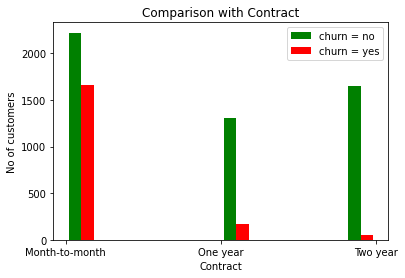

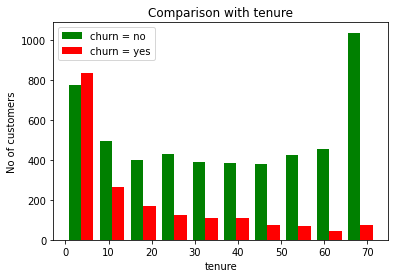

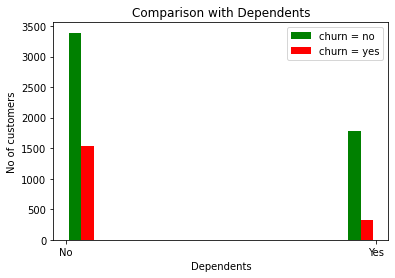

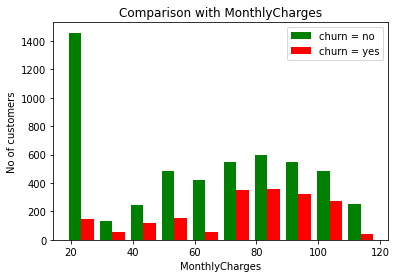

In [6]:
churn_list=['Contract','tenure','Dependents','MonthlyCharges']
# calling churn function
for i in churn_list:
    histogram(i)

#### Observations from plot

* From the plot, we can say that most of the churning customers are in month to month contract.

* Customers who have been with the service less than 10 months are churning more. 

* Monthly Charges ranges from 70-100 dollars are one of the reason for more customers leaving. A customer with low monthly charges (<30) produce is much more likely to be retained.

* If Customers and their dependents are using the service, they aren't churning more.


### Recommendations to retain customers

* By giving bundle offers like Dependents, Streaming TV shows, Internet.(All together but pay less)
* By reducing monthly charges 
* By giving additional offer incentives, if they sign up for more than 1 Year contract. (To avoid quick churn).
* Asking for feedback often from the customers
* By Providing excellent customer service.

### Preprocessing

In [5]:
# I am dropping Customer Id column, because it won't give enough details about why customer is leaving 
churn_df.drop('customerID',axis=1,inplace = True)

In [6]:
# Just to be sure: Is there a missing value left?
churn_df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#### Total charges should be float datatype like monthly charges. But it is in object. Lets check what is in there.

In [7]:
churn_df['TotalCharges'].values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [8]:
# It contains charge cost interms of string. We have to remove it.
pd.to_numeric(churn_df['TotalCharges'],errors = 'coerce')

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [9]:
pd.to_numeric(churn_df['TotalCharges'])

ValueError: Unable to parse string " " at position 488

In [10]:
# Some values are empty strings. Lets find those rows
churn_df[pd.to_numeric(churn_df['TotalCharges'],errors = 'coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [11]:
# I am dropping these 11 rows which is having an empty string in TotalCharges column
churn_new_df = churn_df[churn_df.TotalCharges!=' ']

In [12]:
# after removing empty string, converting Total charges column into floating type
churn_new_df['TotalCharges'] = pd.to_numeric(churn_new_df['TotalCharges'])
churn_new_df.dtypes

C:\Users\Codergirl\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [13]:
# Our dataset has more categorical columns. Many of the columns has "yes" and "no" variable. Lets print column unique values

def unique_values(df):
    for column in df:
        print(f'{column}  {df[column].unique()}')

unique_values(churn_new_df)

gender  ['Female' 'Male']
SeniorCitizen  [0 1]
Partner  ['Yes' 'No']
Dependents  ['No' 'Yes']
tenure  [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService  ['No' 'Yes']
MultipleLines  ['No phone service' 'No' 'Yes']
InternetService  ['DSL' 'Fiber optic' 'No']
OnlineSecurity  ['No' 'Yes' 'No internet service']
OnlineBackup  ['Yes' 'No' 'No internet service']
DeviceProtection  ['No' 'Yes' 'No internet service']
TechSupport  ['No' 'Yes' 'No internet service']
StreamingTV  ['No' 'Yes' 'No internet service']
StreamingMovies  ['No' 'Yes' 'No internet service']
Contract  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling  ['Yes' 'No']
PaymentMethod  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges  [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges 

In [14]:
# I am replacing No phone service, No internet service as simply no. So that those columns will have yes or no. Encoding
# will be easy.

churn_new_df = churn_new_df.replace('No phone service', 'No')
churn_new_df = churn_new_df.replace('No internet service', 'No')

In [15]:
# calling unique_values function to make sure I have replaced it

unique_values(churn_new_df)

gender  ['Female' 'Male']
SeniorCitizen  [0 1]
Partner  ['Yes' 'No']
Dependents  ['No' 'Yes']
tenure  [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService  ['No' 'Yes']
MultipleLines  ['No' 'Yes']
InternetService  ['DSL' 'Fiber optic' 'No']
OnlineSecurity  ['No' 'Yes']
OnlineBackup  ['Yes' 'No']
DeviceProtection  ['No' 'Yes']
TechSupport  ['No' 'Yes']
StreamingTV  ['No' 'Yes']
StreamingMovies  ['No' 'Yes']
Contract  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling  ['Yes' 'No']
PaymentMethod  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges  [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges  [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn  ['No' 'Yes']


#### Using Lambda to encode yes and no features

In [16]:
# Since I have more yes, no columns, first I will replace those columns with 0 and 1

yes_no_columns_list = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                       'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

# using lambda to replace yes and no to 1 and 0

for i in yes_no_columns_list:
    churn_new_df[i] = churn_new_df[i].apply(lambda i: 1 if i == 'Yes' else 0)

In [17]:
# again calling function to check about encoded columns
unique_values(churn_new_df)

gender  ['Female' 'Male']
SeniorCitizen  [0 1]
Partner  [1 0]
Dependents  [0 1]
tenure  [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService  [0 1]
MultipleLines  [0 1]
InternetService  ['DSL' 'Fiber optic' 'No']
OnlineSecurity  [0 1]
OnlineBackup  [1 0]
DeviceProtection  [0 1]
TechSupport  [0 1]
StreamingTV  [0 1]
StreamingMovies  [0 1]
Contract  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling  [1 0]
PaymentMethod  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges  [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges  [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn  [0 1]


#### Using List comprehension to encode gender column

In [18]:
# gender column also contains 2 unique values
churn_new_df['gender'] = [1 if i == 'Yes' else 0 for i in churn_new_df['gender']]

In [19]:
# Now I have only few columns to encode
encoded_churn_df = pd.get_dummies(data = churn_new_df, columns=['InternetService','Contract','PaymentMethod'])
encoded_churn_df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,1,0,1,...,1,0,0,0,1,0,0,0,0,1
7039,0,0,1,1,72,1,1,0,1,1,...,0,1,0,0,1,0,0,1,0,0
7040,0,0,1,1,11,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
7041,0,1,1,0,4,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1


In [20]:
# we can use our function to check whether all columns are encoded or not
unique_values(encoded_churn_df)

gender  [0]
SeniorCitizen  [0 1]
Partner  [1 0]
Dependents  [0 1]
tenure  [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService  [0 1]
MultipleLines  [0 1]
OnlineSecurity  [0 1]
OnlineBackup  [1 0]
DeviceProtection  [0 1]
TechSupport  [0 1]
StreamingTV  [0 1]
StreamingMovies  [0 1]
PaperlessBilling  [1 0]
MonthlyCharges  [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges  [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn  [0 1]
InternetService_DSL  [1 0]
InternetService_Fiber optic  [0 1]
InternetService_No  [0 1]
Contract_Month-to-month  [1 0]
Contract_One year  [0 1]
Contract_Two year  [0 1]
PaymentMethod_Bank transfer (automatic)  [0 1]
PaymentMethod_Credit card (automatic)  [0 1]
PaymentMethod_Electronic check  [1 0]
PaymentMethod_Mailed check  [0 1]


In [21]:
# Finally encoded all categorical columns. Lets check the datatypes of our feature
encoded_churn_df.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

#### Standardization

* In this dataset only 3 features(tenure, Monthly Charges, Total Charges) are continuous variables. Remaining columns are in 0 and 1 range. So we can normalize those 3 columns only.

In [22]:
normalize_list = ['tenure','MonthlyCharges','TotalCharges']
from sklearn.preprocessing import StandardScaler,MinMaxScaler

encoded_churn_df['tenure'] = np.log1p(encoded_churn_df['tenure'])
encoded_churn_df['MonthlyCharges'] = np.log1p(encoded_churn_df['MonthlyCharges'])
encoded_churn_df['TotalCharges'] = np.log1p(encoded_churn_df['TotalCharges'])
# creating an object for standardscaler
scaler = StandardScaler()
encoded_churn_df[normalize_list] = scaler.fit_transform(encoded_churn_df[normalize_list])


In [23]:
encoded_churn_df.tail()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
7038,0,0,1,1,0.154124,1,1,1,0,1,...,1,0,0,0,1,0,0,0,0,1
7039,0,0,1,1,1.085882,1,1,0,1,1,...,0,1,0,0,1,0,0,1,0,0
7040,0,0,1,1,-0.484074,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
7041,0,1,1,0,-1.245307,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1
7042,0,0,0,0,1.011306,1,0,1,0,1,...,0,1,0,0,0,1,1,0,0,0


In [24]:
encoded_churn_df['Churn'].value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [48]:
correlation = encoded_churn_df.corr()
# Analysing highly correlated columns
output_var=abs(correlation['Churn'])
relevant_columns = output_var[output_var>0.35]
relevant_columns

tenure                     0.377949
Churn                      1.000000
Contract_Month-to-month    0.404565
Name: Churn, dtype: float64

#### Creating Heat Map

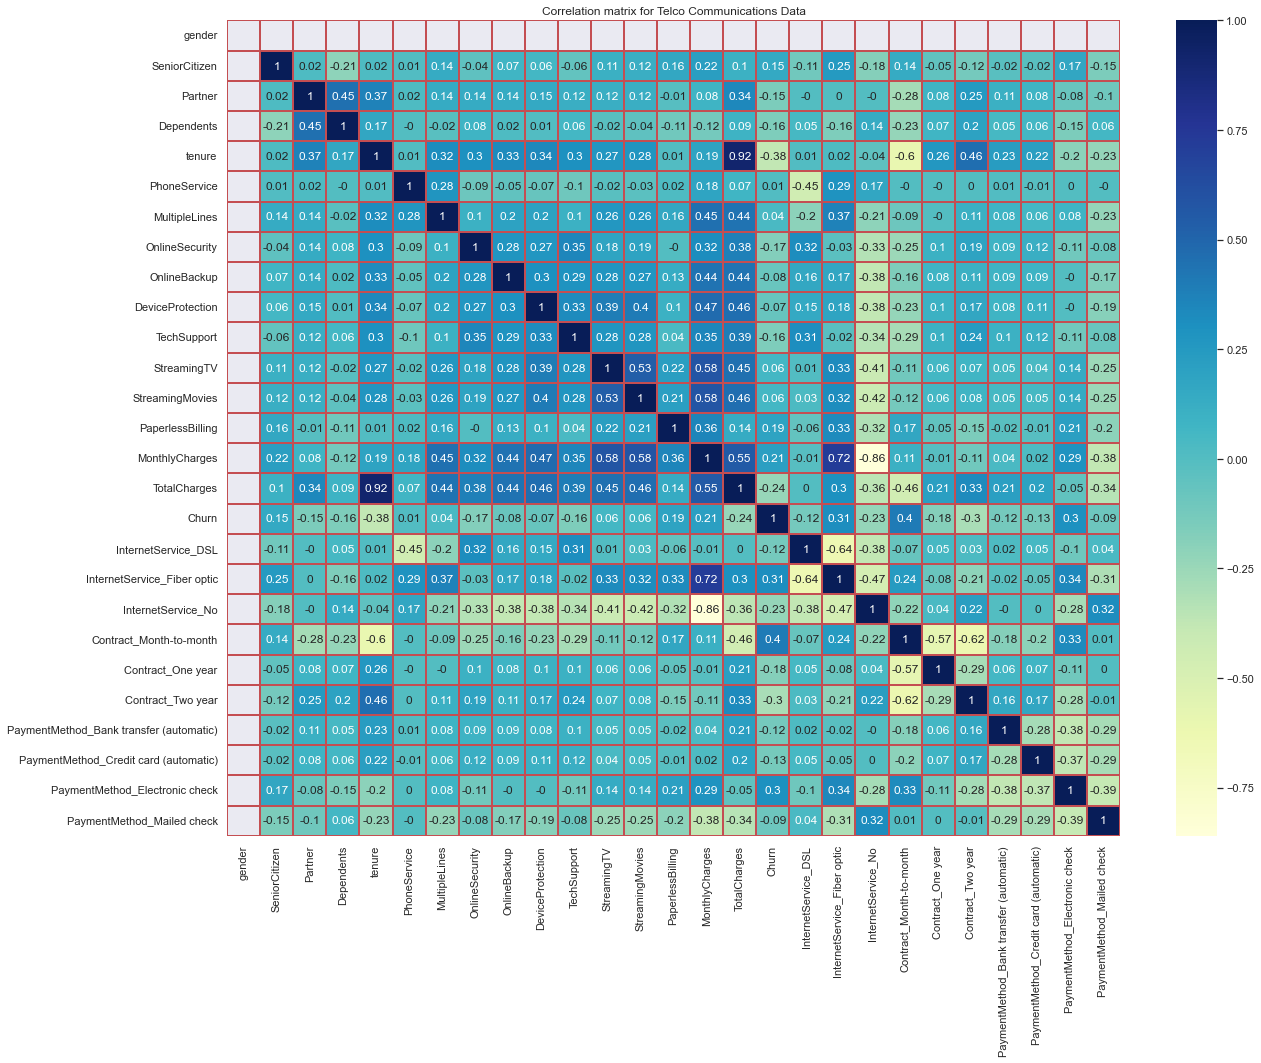

In [46]:
#creating correlation matrix
cor_matrix= encoded_churn_df.corr()
fig,ax=plt.subplots()
sns.set(rc={"figure.figsize":(20, 15)})
sns.heatmap(cor_matrix.round(2),annot= True,cmap="YlGnBu",linewidth=1.5,linecolor='r')
ax.set_title('Correlation matrix for Telco Communications Data');
plt.show()

#### Discussions from Correlation Heat Map

 * The correlation goes from + 1 to - 1 where 1 is total positive linear correlation 0 is no linear correlation and negative 1 is total negative linear correlation.

 * From color bar,

    * Yellows are negative correlations,

    * Darker the yellow, stronger negative correlation

    * Middle section where the colors are real light blue where there's not much correlation at all

    * the Dark blues are positive correlation and

    * the darker the blue the stronger positive correlation

    * Churn is highly correlated(positive correlation)with tenure,InternetService_Fiber optic, Contract_Month-to-month,        Contract_Two year, PaymentMethod_Electronic check.

    * Churn is strongly correlated with itself.


#### Checking for outliers

* Easiest way of checking outliers is by plotting blot box for that feature. 

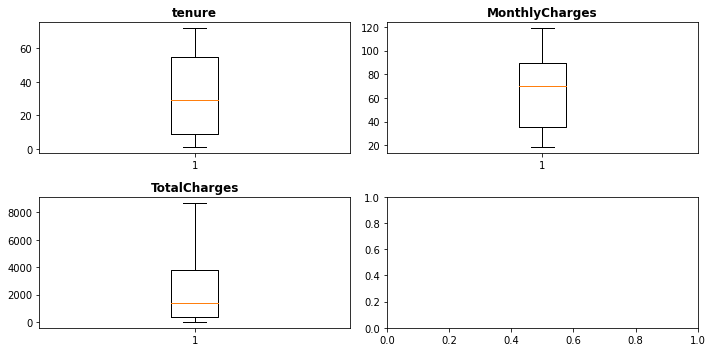

In [36]:
plt.rcParams["figure.figsize"] = (10,5)
fig,ax = plt.subplots(2,2) # 2 rows 2 columns

ax[0,0].boxplot(encoded_churn_df['tenure'])
ax[0,0].set_title("tenure", weight='bold')
ax[0,1].boxplot(encoded_churn_df['MonthlyCharges'])
ax[0,1].set_title("MonthlyCharges",weight='bold')
ax[1,0].boxplot(encoded_churn_df['TotalCharges'])
ax[1,0].set_title("TotalCharges",weight='bold')
plt.tight_layout()
plt.show();

In [ ]:
# Boxplot clearly shows that there are no outliers in the data. 
# Now our dataset is ready to apply Machine learning models.

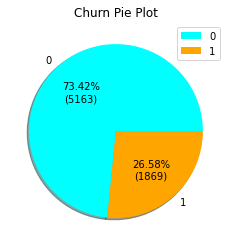

In [35]:
# pie plot to show how many customers are retaining and churning
def my_fmt(x):
    return '{:.2f}%\n({:.0f})'.format(x, total*x/100)
v_counts = encoded_churn_df['Churn'].value_counts()
total = len(encoded_churn_df['Churn'])
fig = plt.figure()
color = ('cyan','orange')
plt.pie(v_counts,labels=v_counts.index,autopct=my_fmt,colors = color, shadow=True)
plt.title("Churn Pie Plot")
plt.legend();

In [ ]:
# Pie plot shows that, our dataset is unbalanced, We have more 0s. 

### Summary about preprocessing steps:

* There are no null values in this dataset.
* Encoded 18 categorical columns
* Standardized 3 columns(tenure, MonthlyCharges, TotalCharges)
* Checked for outliers

## Model Selection

### Splitting datas into train and test datasets

* We have to see **how our model is performing in an unseen data**. And also we don't want to check performance of our model in the same dataset which we trained. Because it might be **biased**.

* So we are spliiting our datas into train and test sets.

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn import svm
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score
import xgboost as xgb
import warnings
warnings.filterwarnings("ignore")
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

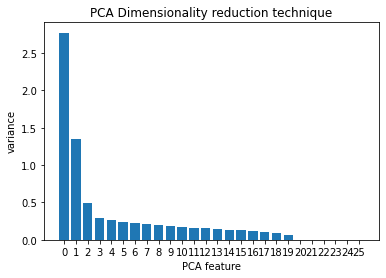

In [50]:
# input and predicting column
X = encoded_churn_df.drop('Churn',axis = 1)
y = encoded_churn_df['Churn']

# splitting train and test data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 6)

variance = []
for i in range(1,27):
    pca = PCA(n_components = i)
    pca_model = pca.fit(X_train,y_train)
    features = range(pca.n_components_)
    exp_var = pca.explained_variance_
    variance.append(exp_var)
    
# Plot the explained variances
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.title('PCA Dimensionality reduction technique')
plt.show()

#### 1.GaussianNB Classifier

AUC score from GaussianNB Classifier 0.86


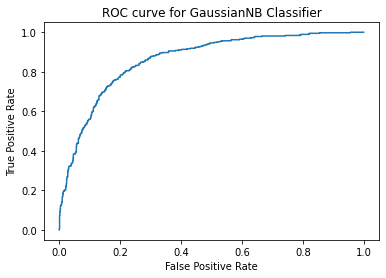

In [51]:
# I am choosing no of components as 3. Because from 3, variance started decreasing gradually.
# using pipeline, combining pca and logistic regression together

# creating an object for GB & pca
GB = GaussianNB()
pca = PCA(n_components = 3)

# making pipeline with pca and Gaussian Naive Bayes model
pipeline_GB = make_pipeline(pca,GB)

# Fit the pipeline to input
pipeline_GB.fit(X_train, y_train)

# Now that I have trained my model, using it on test data to predict output
y_pred_pca = pipeline_GB.predict(X_test)

# predicting probabilities
y_pred_prob_GB = pipeline_pca.predict_proba(X_test)[:,1]

# roc curve for model
fpr, tpr, thresholds = roc_curve(y_test,y_pred_prob_GB)
 
# auc score
print("AUC score from GaussianNB Classifier",roc_auc_score(y_test,y_pred_prob_GB).round(2))

# we can plot our roc curve
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC curve for GaussianNB Classifier")
plt.show()

#### 2.Logistic Regression

AUC score from LogisticRegression 0.87


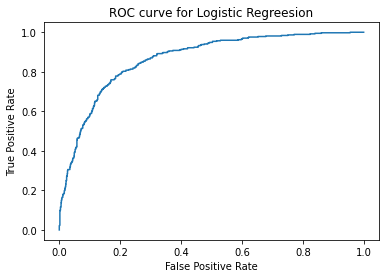

In [52]:
# creating an object for logistic regression
LR = LogisticRegression(random_state = 6)

# making pipeline with pca and Gaussian Naive Bayes model
pipeline_LR = make_pipeline(pca,LR)

# Fit the pipeline to input
pipeline_LR.fit(X_train, y_train)

# predicting outcome
y_pred_LR = pipeline_LR.predict(X_test)

# predicting probabilities
y_pred_prob_LR = pipeline_LR.predict_proba(X_test)[:,1]

# roc curve for model
fpr, tpr, thresholds = roc_curve(y_test,y_pred_prob_LR)
 
# auc score
print("AUC score from LogisticRegression",roc_auc_score(y_test,y_pred_prob_LR).round(2))

# we can plot our roc curve
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC curve for Logistic Regression")
plt.show()

#### 3.Support Vector Machines

AUC score from Support Vector Machines 0.87


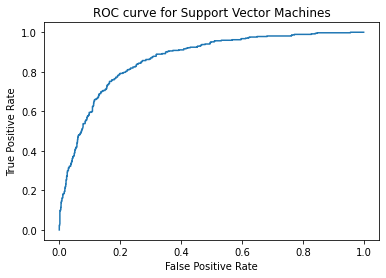

In [54]:
# creating an object for svc
SVC = svm.SVC(kernel='linear',probability=True)

# making pipeline with pca and Gaussian Naive Bayes model
pipeline_SVC = make_pipeline(pca,SVC)

# Fit the pipeline to input
pipeline_SVC.fit(X_train, y_train)

# predicting outcome
y_pred_SVC = pipeline_SVC.predict(X_test)

# predicting probabilities
y_pred_prob_SVC = pipeline_SVC.predict_proba(X_test)[:,1]

# roc curve for model
fpr, tpr, thresholds = roc_curve(y_test,y_pred_prob_SVC)
 
# auc score
print("AUC score from Support Vector Machines",roc_auc_score(y_test,y_pred_prob_SVC).round(2))

# we can plot our roc curve
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC curve for Support Vector Machines")
plt.show()

#### 4.RandomForestClassifier(Bagging technique)

AUC score from RandomForestClassifier 0.84


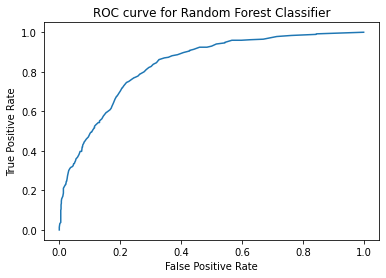

In [55]:
# creating an object for random forest classifier
RFC = RandomForestClassifier(random_state = 6)

# making pipeline with pca and Gaussian Naive Bayes model
pipeline_RFC = make_pipeline(pca,RFC)

# Fit the pipeline to input
pipeline_RFC.fit(X_train, y_train)


# predicting outcome
y_pred_RF = pipeline_RFC.predict(X_test)

# predicting probabilities
y_pred_prob_RF = pipeline_RFC.predict_proba(X_test)[:,1]

# roc curve for model
fpr, tpr, thresholds = roc_curve(y_test,y_pred_prob_RF)
 
# auc score
print("AUC score from RandomForestClassifier",roc_auc_score(y_test,y_pred_prob_RF).round(2))

# we can plot our roc curve
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC curve for Random Forest Classifier")
plt.show()

#### 5.XGBoost Classifier(Boosting technique)

C:\Users\Codergirl\AppData\Local\Programs\Python\Python37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


AUC score from XGBoostClassifier 0.83


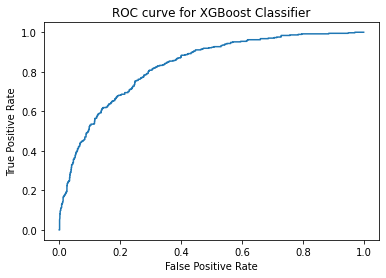

In [56]:
# Instantiate the XGBRegressor
XG = xgb.XGBClassifier(objective = 'reg:squarederror',random_state = 6)

# making pipeline with pca and Gaussian Naive Bayes model
pipeline_XG = make_pipeline(pca,XG)

# Fit the pipeline to input
pipeline_XG.fit(X_train, y_train)

# Predict the labels of the test set
y_pred_XG = pipeline_XG.predict(X_test)

# predicting probabilities
y_pred_prob_XG = pipeline_XG.predict_proba(X_test)[:,1]

# roc curve for model
fpr, tpr, thresholds = roc_curve(y_test,y_pred_prob_XG)
 
# auc score
print("AUC score from XGBoostClassifier",roc_auc_score(y_test,y_pred_prob_XG).round(2))

# we can plot our roc curve
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC curve for XGBoost Classifier")
plt.show()

## Hyper parameter tuning

* A parameter being manually set by modeler is called hyper parameter. To obtain best model performance we need to tune hyper parameters.

* Model's default hyperparameters are not optimal for all problems.

#### 1.GaussianNB Classifier 

In [57]:
from collections import Counter
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE

### Using SMOTE technique to balance our data

In [58]:
# since our data is unbalanced, I am using over sampling technique called SMOTE to balance it.
# Instantiate SMOTE
smote = SMOTE(random_state = 0)

#using counter to see before and after count of minority and majority classes
counter = Counter(y_train)
print("Before",counter)

#rebalancing data using SMOTE-ENN
X_resample, y_resample = smote.fit_resample(X_train,y_train)

counter = Counter(y_resample)
print("After",counter)

Before Counter({0: 4126, 1: 1499})
After Counter({0: 4126, 1: 4126})


In [62]:
# fitting the model
GB = GaussianNB()

# making pipeline with pca and Gaussian Naive Bayes model
pipeline_GB = make_pipeline(pca,GB)

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=GB, 
                 param_grid=params_NB, 
                 cv=5,    
                 verbose=1, 
                 scoring='accuracy') 
gs_NB.fit(X_resample,y_resample)

# predicting output 
y_pred_nbc = gs_NB.predict(X_test)
y_prob_NB_hpt = gs_NB.predict_proba(X_test)[:,1]

# roc curve for model
fpr, tpr, thresholds = roc_curve(y_test,y_prob_NB_hpt)
 
# auc score
print("AUC score from GaussianNB Classifier after hyperparameter tuning",roc_auc_score(y_test,y_prob_NB_hpt).round(2))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
AUC score from GaussianNB Classifier after hyperparameter tuning 0.86


* I decided to tune all classifiers hyper parameters with grid search cross validation.

#### 2.Logistic Regreesion

In [66]:

# fitting the model
LR = LogisticRegression()

params_LR = {"C":np.logspace(-1,1,2), "penalty":["l1","l2"]}
LR_hpt = GridSearchCV(estimator=LR, 
                 param_grid=params_LR, 
                 cv=5,    
                 verbose=1, 
                 scoring='accuracy') 
LR_hpt.fit(X_resample,y_resample)

# predicting output 
y_pred_LR = LR_hpt.predict(X_test)
y_prob_LR_hpt = LR_hpt.predict_proba(X_test)[:,1]

# roc curve for model
fpr, tpr, thresholds = roc_curve(y_test,y_prob_LR_hpt)
 
# auc score
print("AUC score from Logistic Regression after hyperparameter tuning",roc_auc_score(y_test,y_prob_LR_hpt).round(2))

print('training accuracy', LR_hpt.score(X_resample,y_resample).round(2))
print('testing accuracy', LR_hpt.score(X_test,y_test).round(2))

Fitting 5 folds for each of 4 candidates, totalling 20 fits
AUC score from Logistic Regression after hyperparameter tuning 0.86
training accuracy 0.8
testing accuracy 0.78


#### 3.Support Vector Machines

In [39]:
# creating an object for svc
SVC = svm.SVC(probability=True)

param_SVC = {'C': [0.1],
              'gamma': [0.001],
              'kernel': ['rbf']}

SVC_hpt = GridSearchCV(estimator=SVC, 
                 param_grid=param_SVC, 
                 refit = True) 
SVC_hpt.fit(X_resample,y_resample)

# predicting output 
y_pred_SVC = SVC_hpt.predict(X_test)
y_prob_SVC_hpt = SVC_hpt.predict_proba(X_test)[:,1]

# roc curve for model
fpr, tpr, thresholds = roc_curve(y_test,y_prob_SVC_hpt)
 
# auc score
print("AUC score from SVC after hyperparameter tuning",roc_auc_score(y_test,y_prob_SVC_hpt).round(2))

AUC score from SVC after hyperparameter tuning 0.84
training accuracy 0.73
testing accuracy 0.73


#### 4.RandomForestClassifier(Bagging technique)

In [68]:
# creating an object for random forest classifier
RFC = RandomForestClassifier(random_state = 6)

params_RFC = {'max_depth': [6], 'max_features': ['log2'], 'min_samples_leaf': [10], 'n_estimators': [50]}
RFC_hpt = GridSearchCV(estimator=RFC, 
                 param_grid=params_RFC, 
                 cv=5,    
                 verbose=1, 
                 scoring='accuracy') 

RFC_hpt.fit(X_resample,y_resample)
# predicting output 
y_pred_RFC = RFC_hpt.predict(X_test)
y_prob_RFC_hpt = RFC_hpt.predict_proba(X_test)[:,1]

# roc curve for model
fpr, tpr, thresholds = roc_curve(y_test,y_prob_RFC_hpt)
 
# auc score
print("AUC score from RandomForestClassifier after hyperparameter tuning",roc_auc_score(y_test,y_prob_RFC_hpt).round(2))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
AUC score from RandomForestClassifier after hyperparameter tuning 0.86


#### 5.XGBoost Classifier(Boosting technique)

In [67]:
# Instantiate the XGBClassifier
XG = xgb.XGBClassifier(objective = 'reg:squarederror',random_state = 6)

params_XG = {'learning_rate':[0.1],'n_estimators':[100],'max_depth':[5],'min_child_weight':[1],'gamma':[0],\
             'subsample':[0.8],'colsample_bytree':[0.8],'objective':['binary:logistic'],'nthread':[4],'scale_pos_weight':[1]}

XG_hpt = GridSearchCV(estimator=XG, 
                 param_grid=params_XG, 
                 cv=2,    
                 verbose=1, 
                 scoring='accuracy') 

XG_hpt.fit(X_resample,y_resample)
# predicting output 
y_pred_XG = XG_hpt.predict(X_test)
y_prob_XG_hpt = XG_hpt.predict_proba(X_test)[:,1]

# roc curve for model
fpr, tpr, thresholds = roc_curve(y_test,y_prob_XG_hpt)
 
# auc score
print("AUC score from XGBClassifier after hyperparameter tuning",roc_auc_score(y_test,y_prob_XG_hpt).round(2))

Fitting 2 folds for each of 1 candidates, totalling 2 fits
[13:59:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:59:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:59:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
AUC score f

## Result Interpretation

I have performed the following methods:

   * GaussianNBClassifier
   * LogisticRegression	
   * Support Vector Machines
   * RandomForestClassifier
   * XGBoost Classifier
    
    
Comparing performance between models:

|Performance metric|GaussianNBClassifier|LogisticRegression|SupportVectorMachines|RandomForestClassifier|XGBoostClassifier|
|:----------------:|:------------------:|:----------------:|:-------------------:|:--------------------:|:---------------:|
| AUC score        |  0.85              |     0.86         |          0.84       |        0.85          |     0.85        |




### Performance Metric
#### Explanation for ROC curve and AUC score

* Since it is classification problem, I am taking ROC(Receiver Optimistic Curve) and AUC(Area Under Curve) score as my performance metrics. The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes.

* **Perfect test ROC curve hugs along the left handed side and goes horizontally across the top**. If curve looks like a diagonal line that cuts across the middle then that is an useless test.

* Area Under ROC curve(AUC) is a measure of **ability of a classifier to distinguish between classes**. 
     * If AUC = 1 then its a perfect model.
     * If 0.5 < AUC < 1 then classifier can distinguish the positive class from negative class well.
     * If AUC < 0.5 then its poor model. It might classified positive class as negative and vice verse.
       
* We got our AUC is 0.86 from Logistic Regression. So model predicted 0s as 0 and 1s as 1 well. Compare to all methods I have taken, **Logistic Regression** performs well and gave high AUC score for this problem.

### Is overfitted or Underfitted?

In [42]:
# I am checking my training and testing accuracy of logistic regression model.My model is not over or under fitted. Because
# training and testing accuracies are almost same.

print('training accuracy', LR_hpt.score(X_resample,y_resample).round(2))
print('testing accuracy', LR_hpt.score(X_test,y_test).round(2))

training accuracy 0.75
testing accuracy 0.76


## Conclusion

* I have started by cleaning the telco customer churn data and analyzing it with visualization. Stored the data in a database and used ETL to get it there. Created a data model. Then, to be able to build a machine learning model, I have transformed the categorical data into numeric variables (feature engineering). After transforming the data, I tried 5 different machine learning algorithms using default parameters. And then, tuned the hyperparameters of those algorithms for model optimization, obtaining an AUC score of 86% from Logistic Regression Algorithm.